<a href="https://colab.research.google.com/github/VISHWAJITT123/CVG-FILES/blob/master/AutoEncoder_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.datasets import cifar10
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [2]:
(x_train,_),(x_test,_) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
def show_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [5]:
def show_data1(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

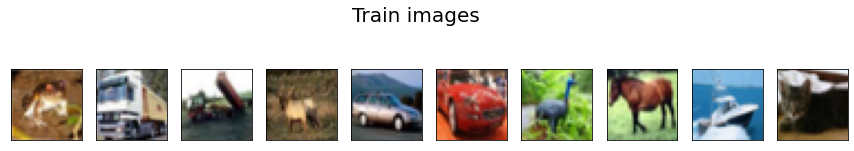

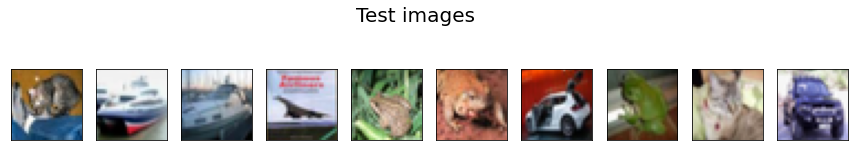

In [6]:
show_data(x_train,title='Train images')
show_data(x_test, title='Test images')

In [7]:
input_layer = Input(shape=(32, 32, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [8]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='mse')
AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
CODE (MaxPooling2D)          (None, 4, 4, 8)           0     

In [9]:
AE.fit(x_train,x_train,epochs = 20,batch_size = 32, shuffle = True, validation_data=(x_test,x_test))

Epoch 1/20
1563/1563 [==============================] - 41s 5ms/step - loss: 2459.4110 - val_loss: 1059.1816
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1000.6485 - val_loss: 921.7412
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 909.3269 - val_loss: 875.9663
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 862.9179 - val_loss: 838.4459
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 830.8074 - val_loss: 832.7768
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 814.5315 - val_loss: 790.5926
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 790.9671 - val_loss: 775.0106
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 770.3416 - val_loss: 754.0991
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 750.0501 - val_loss: 738.9526
Epoch 10/20
1563/1563 [===================

In [10]:
encoded = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [11]:
encoded_AE = encoded.predict(x_test)
encoded_AE = encoded_AE.reshape((len(x_test), 8*8*2))
encoded_AE.shape

(10000, 128)

In [12]:
reconstructed_AE = AE.predict(x_test)

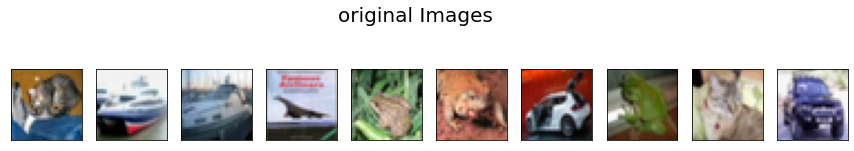

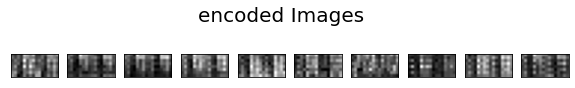

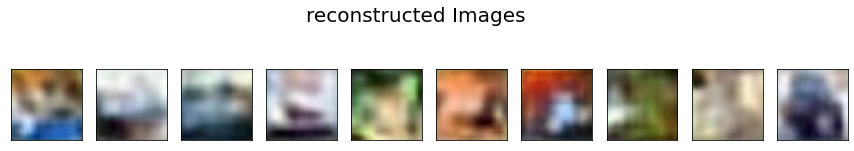

In [13]:
show_data(x_test, title="original Images")
show_data1(encoded_AE, height=8, width=16, title="encoded Images")
show_data(reconstructed_AE, title="reconstructed Images")

In [14]:
from skimage import metrics

In [27]:
psnr_skimg = metrics.peak_signal_noise_ratio(x_test[:10], reconstructed_AE[:10], data_range=None)
print("PSNR: based on scikit-image = ", psnr_skimg)

PSNR: based on scikit-image =  19.710081185475786


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.


In [25]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(x_test[:10], reconstructed_AE[:10],
                  data_range = 255,
                  multichannel = True)
print("SSIM: based on scikit-image = ", ssim_skimg)


SSIM: based on scikit-image =  0.8418782345357636
